In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_data = pd.read_csv("Bank Customer Churn Prediction.csv")
bank_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
bank_data.shape

(10000, 12)

In [4]:
bank_data.duplicated().sum()

np.int64(0)

In [5]:
bank_data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
bank_data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
bank_data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
bank_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

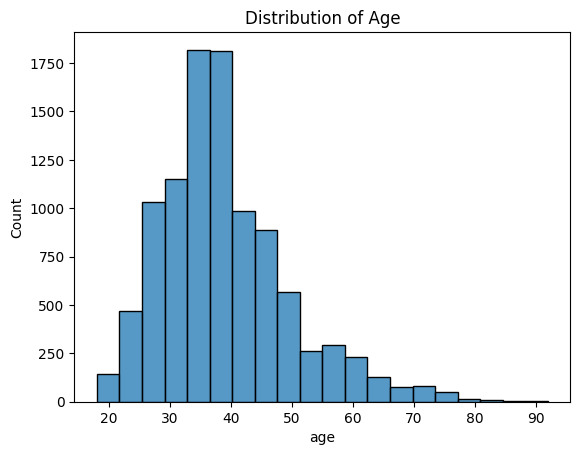

In [9]:
sns.histplot(data=bank_data, x='age', bins=20)
plt.title('Distribution of Age')
plt.show()

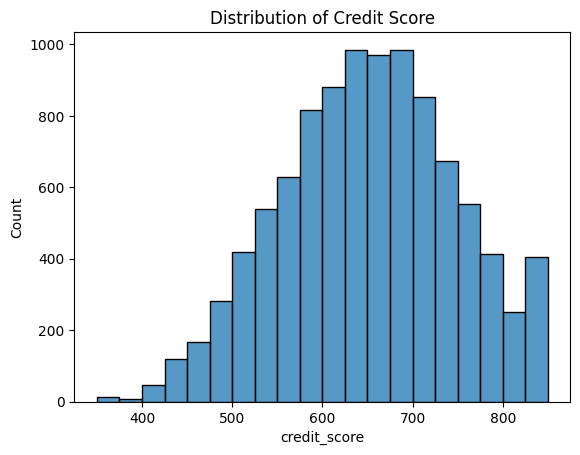

In [10]:
sns.histplot(data=bank_data, x='credit_score', bins=20)
plt.title('Distribution of Credit Score')
plt.show()

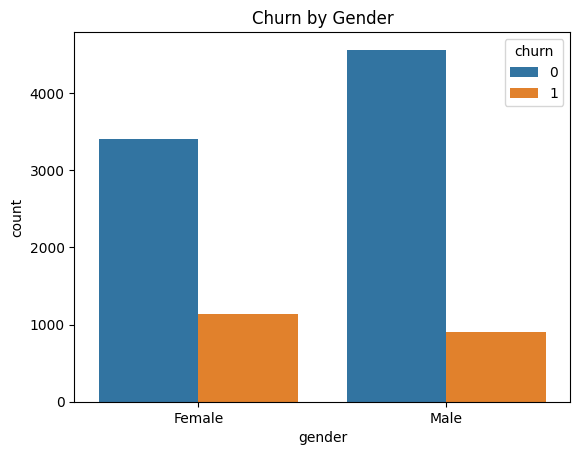

In [11]:
sns.countplot(data=bank_data, x='gender', hue='churn')
plt.title('Churn by Gender')
plt.show()

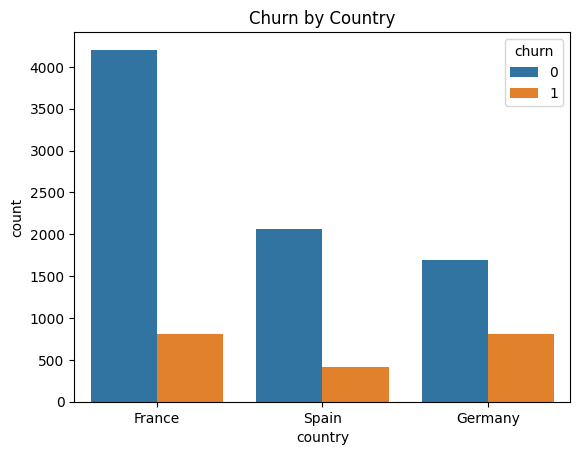

In [12]:
sns.countplot(data=bank_data, x='country', hue='churn')
plt.title('Churn by Country')
plt.show()

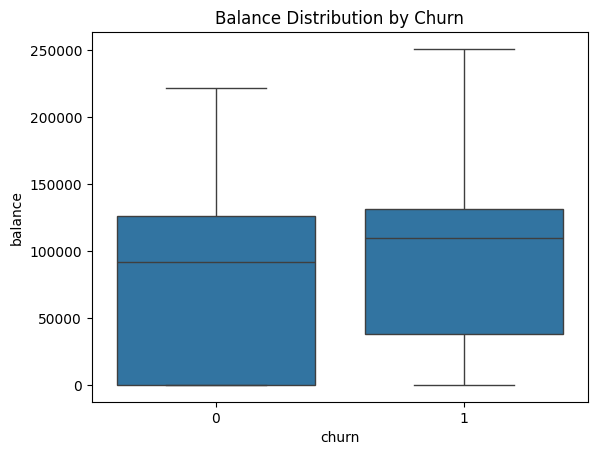

In [13]:
sns.boxplot(data=bank_data, x='churn', y='balance')
plt.title('Balance Distribution by Churn')
plt.show()

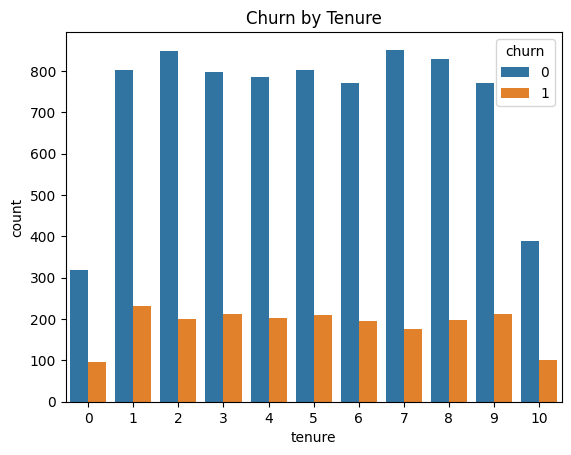

In [14]:
sns.countplot(data=bank_data, x='tenure', hue='churn')
plt.title('Churn by Tenure')
plt.show()

In [15]:
bank_data.loc[bank_data['credit_card'] == 0]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
10,15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
13,15691483,549,France,Female,25,5,0.00,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,15719276,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0
9983,15656710,613,France,Male,40,4,0.00,1,0,0,151325.24,0
9986,15581736,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0


Churn Prediction Model

In [16]:
bank_data.replace({"Female":0,"Male":1},inplace=True)
bank_data

C:\Users\ammar\AppData\Local\Temp\ipykernel_4116\72470465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data.replace({"Female":0,"Male":1},inplace=True)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:
bank_data.replace({"France":0,"Spain":1,"Germany":2},inplace=True)
bank_data

C:\Users\ammar\AppData\Local\Temp\ipykernel_4116\1759378395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data.replace({"France":0,"Spain":1,"Germany":2},inplace=True)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = bank_data.drop(columns=['customer_id', 'churn'])
y = bank_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
knn.score(X_test,y_test)

0.764

[[1491  116]
 [ 356   37]]


Text(0.5, 1.0, 'KNN Confusion Matrix')

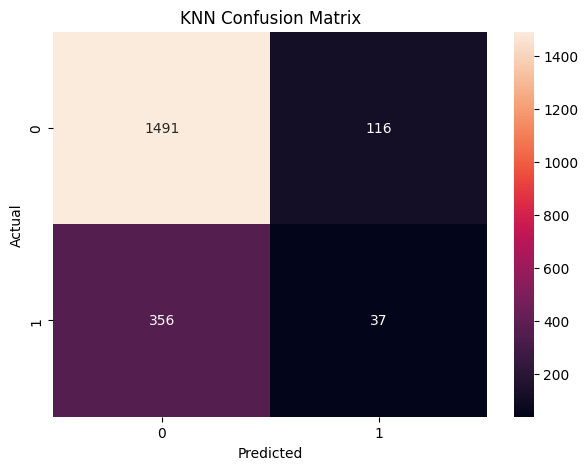

In [20]:
y_pred = knn.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test,y_pred)
print(knn_confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')

In [21]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naivebayes = GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = naivebayes.predict(X_test)
naivebayes.score(X_test,y_test)

0.79

[[1553   54]
 [ 366   27]]


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

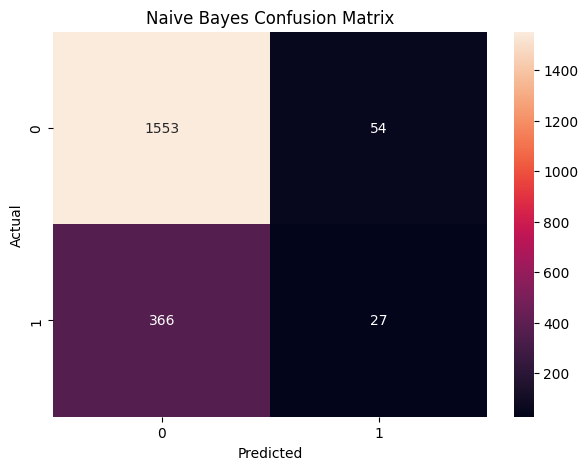

In [23]:
nb_confusion_matrix = confusion_matrix(y_test,y_pred)
print(nb_confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = decision_tree.predict(X_test)

decision_tree.score(X_test,y_test)

0.7815

[[1369  238]
 [ 199  194]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

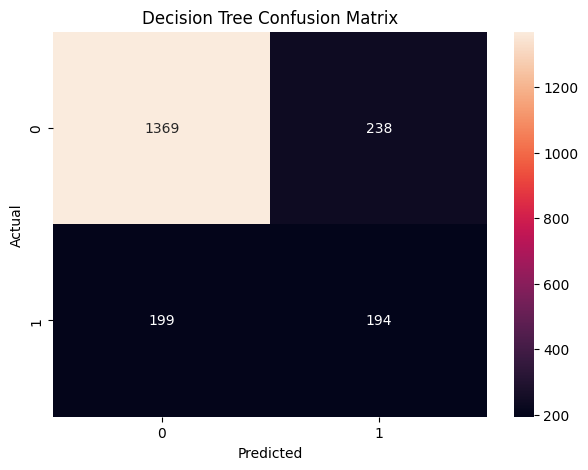

In [26]:
dt_confusion_matrix = confusion_matrix(y_test,y_pred)
print(dt_confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

In [27]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('knn', knn),('dt', decision_tree), ('nb', naivebayes)], voting='hard')

ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('nb', GaussianNB())])

In [28]:
y_pred = ensemble_model.predict(X_test)
ensemble_model.score(X_test,y_test)

0.8055

[[1571   36]
 [ 353   40]]


Text(0.5, 1.0, 'Ensemble Model Confusion Matrix')

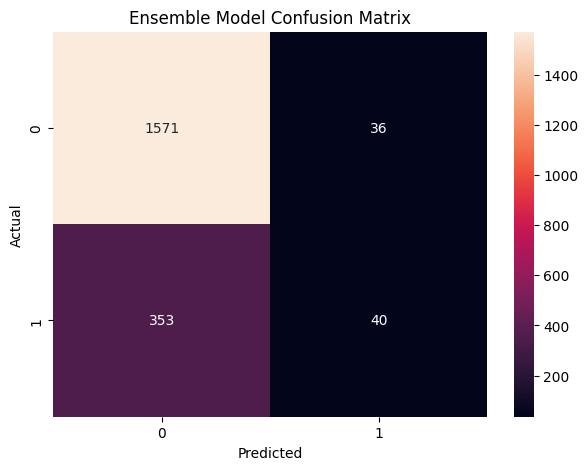

In [36]:
ensemble_confusion_matrix = confusion_matrix(y_test,y_pred)
print(ensemble_confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(ensemble_confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Model Confusion Matrix')

In [30]:
import pickle

# Save the trained model to a file
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)


In [31]:
# Load the model from the file
with open('ensemble_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [32]:
import pandas as pd

sample_input = pd.DataFrame([{
    'credit_score': 619,
    'country': 0,  # e.g., France
    'gender': 1,  # 0 = Male, 1 = Female
    'age': 42,
    'tenure': 2,
    'balance': 0.00,
    'products_number': 1,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 101348.88
}])


In [33]:
prediction = loaded_model.predict(sample_input)
print("Predicted churn (1=Yes, 0=No):", prediction[0])


Predicted churn (1=Yes, 0=No): 0


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split original data
X = bank_data.drop(columns=['customer_id', 'churn'])
y = bank_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({0: 6356, 1: 1644})
After SMOTE: Counter({0: 6356, 1: 6356})


In [35]:
ensemble_model.fit(X_train_balanced, y_train_balanced)


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('nb', GaussianNB())])